In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('smsspamcollection.tsv',sep = '\t')

In [9]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [10]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [12]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [14]:
df[df['label'] =='ham']['length']

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     36
5569     57
5570    125
5571     26
Name: length, Length: 4825, dtype: int64

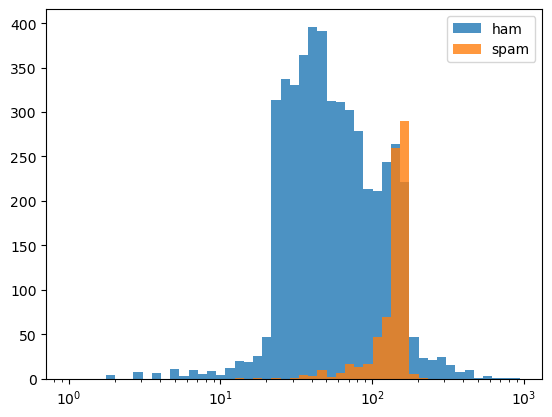

In [15]:
import matplotlib.pyplot as plt

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [18]:
bins = 1.15**(np.arange(0,50))
bins

array([  1.        ,   1.15      ,   1.3225    ,   1.520875  ,
         1.74900625,   2.01135719,   2.31306077,   2.66001988,
         3.05902286,   3.51787629,   4.04555774,   4.6523914 ,
         5.35025011,   6.15278762,   7.07570576,   8.13706163,
         9.35762087,  10.761264  ,  12.37545361,  14.23177165,
        16.36653739,  18.821518  ,  21.6447457 ,  24.89145756,
        28.62517619,  32.91895262,  37.85679551,  43.53531484,
        50.06561207,  57.57545388,  66.21177196,  76.14353775,
        87.56506841, 100.69982867, 115.80480298, 133.17552342,
       153.15185194, 176.12462973, 202.54332419, 232.92482281,
       267.86354623, 308.04307817, 354.2495399 , 407.38697088,
       468.49501651, 538.76926899, 619.58465934, 712.52235824,
       819.40071197, 942.31081877])

In [19]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

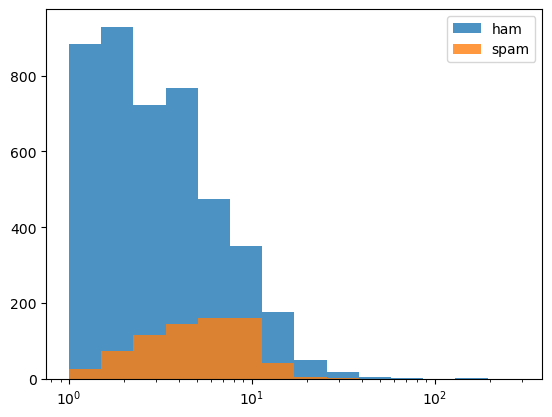

In [20]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [47]:
from sklearn.model_selection import train_test_split

X = df['message']  # this time we want to look at the text
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
count_vect = CountVectorizer()

In [49]:
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(3733, 7082)

In [50]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3733, 7082)

# Combine Steps with TfidVectorizer

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) 
X_train_tfidf.shape

(3733, 7082)

Train a Classifier
Here we'll introduce an SVM classifier that's similar to SVC, called LinearSVC. LinearSVC handles sparse input better, and scales well to large numbers of samples.

In [53]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [63]:
from sklearn.pipeline import Pipeline

In [64]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf',LinearSVC())])

In [66]:
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [69]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [70]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[1586    7]
 [  12  234]]


In [72]:
DisCM = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test,predictions))

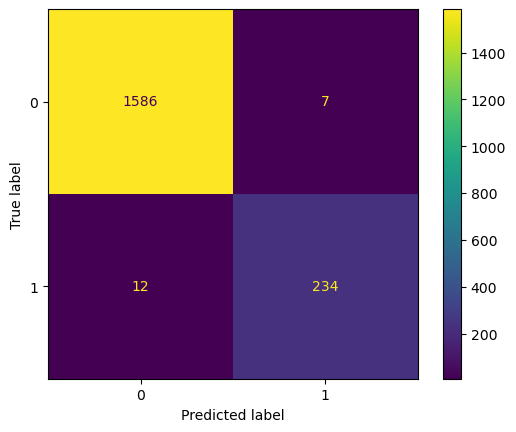

In [74]:
DisCM.plot()

In [75]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [76]:
print(metrics.accuracy_score(y_test,predictions))

0.989668297988037
